In [1]:
#PREDICT EURO Value againtes other foriegn currency exhange rates


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import required libraries
import numpy as np
import pandas as pd

import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data set
forex_data = pd.read_csv('/content/drive/MyDrive/ECB_FX_USD-quote.csv')
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,#date,#value+eur,#value+jpy,#value+bgn,#value+czk,#value+dkk,#value+gbp,#value+huf,#value+pln,#value+ron,...,#value+ils,#value+inr,#value+krw,#value+mxn,#value+myr,#value+nzd,#value+php,#value+sgd,#value+thb,#value+zar
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623


In [5]:
#Remove First Row
forex_data =  forex_data.drop(0)


In [6]:
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623
5,2022-05-16,1.0422,0.007719428190504408,0.532876572246651,0.042177256171590446,0.1400467628799484,1.2254688694220706,0.0027010496306854996,0.22328869844670593,0.2106773939234672,...,0.2937926368607994,0.012853812853812853,0.0007789819866955677,0.04978884408858993,0.22737586176804261,0.6277935064152762,0.019051275020564848,0.7172252425848187,0.028731322710481337,0.06159756493986229


<Figure size 864x576 with 0 Axes>

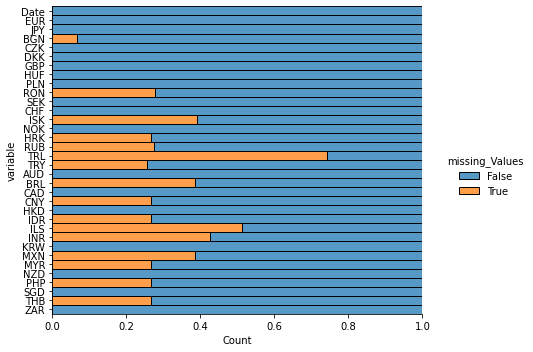

In [7]:
#Plot data to indentify missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)
plt.savefig("visualizing_missing_data.png", dpi=100)


In [8]:
#Dropping currecnys with missing values(more than 50%)

forex_data.drop(columns=['TRL'],inplace=True)

forex_data.drop(columns=['ILS'],inplace=True)

forex_data.drop(columns=['INR'],inplace=True)

forex_data.drop(columns=['ISK'],inplace=True)

forex_data.drop(columns=['BRL'],inplace=True)

forex_data.drop(columns=['MXN'],inplace=True)

<Figure size 864x576 with 0 Axes>

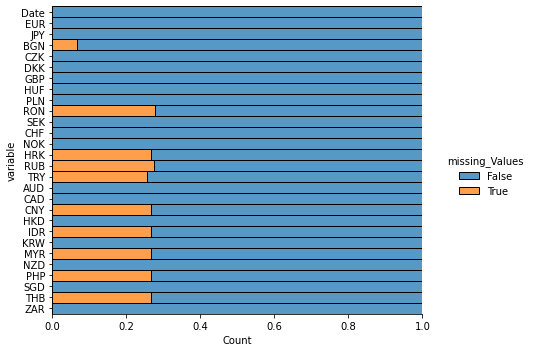

In [9]:
#Plot data after removing missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)

In [10]:
#existing null value conut

forex_data.isnull().sum()

Date       0
EUR        0
JPY        0
BGN      398
CZK        0
DKK        0
GBP        0
HUF        0
PLN        0
RON     1664
SEK        0
CHF        0
NOK        0
HRK     1599
RUB     1655
TRY     1537
AUD        0
CAD        0
CNY     1599
HKD        0
IDR     1599
KRW        0
MYR     1599
NZD        0
PHP     1599
SGD        0
THB     1599
ZAR        0
dtype: int64

In [11]:
#Describe
forex_data.describe()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,CNY,HKD,IDR,KRW,MYR,NZD,PHP,SGD,THB,ZAR
count,5988,5988,5988,5590,5988,5988,5988,5988,5988,4324,...,4389,5988,4389,5988,4389,5988,4389,5988,4389,5988
unique,5988,3609,5983,3922,5977,5967,5984,5988,5988,4322,...,4382,5936,4346,5978,4383,5986,4382,5983,4381,5984
top,2022-05-20,1.2276,0.009709060094626085,0.5734226403517741,0.05059346607384497,0.16038192576654117,1.5630750038983314,0.00276212362572794,0.22812466300010786,0.24944604021337713,...,0.12082393625018795,0.12903225806451613,9.09090909090909e-05,0.0007692307692307692,0.28567040393180776,0.5154549634700862,0.02,0.6260014197343068,0.03333333333333333,0.14285714285714288
freq,1,9,2,8,2,2,2,1,1,2,...,2,14,5,6,2,2,3,2,4,2


In [12]:
#Identify data type missmatching issues
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 1 to 5988
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5988 non-null   object
 1   EUR     5988 non-null   object
 2   JPY     5988 non-null   object
 3   BGN     5590 non-null   object
 4   CZK     5988 non-null   object
 5   DKK     5988 non-null   object
 6   GBP     5988 non-null   object
 7   HUF     5988 non-null   object
 8   PLN     5988 non-null   object
 9   RON     4324 non-null   object
 10  SEK     5988 non-null   object
 11  CHF     5988 non-null   object
 12  NOK     5988 non-null   object
 13  HRK     4389 non-null   object
 14  RUB     4333 non-null   object
 15  TRY     4451 non-null   object
 16  AUD     5988 non-null   object
 17  CAD     5988 non-null   object
 18  CNY     4389 non-null   object
 19  HKD     5988 non-null   object
 20  IDR     4389 non-null   object
 21  KRW     5988 non-null   object
 22  MYR     4389 non-null   

In [13]:
#Conver dictornary

curruncy_type_map = {

     'EUR':float,

     'JPY':float,

     'BGN':float,

     'CZK':float,

     'DKK':float,

     'GBP':float,

     'HUF':float,

     'PLN':float,

     'RON':float,

     'SEK':float,

     'CHF':float,

      'NOK':float,

     'HRK':float,

     'RUB':float,

     'TRY':float,

     'AUD':float,

     'CAD':float,

     'CNY':float,

      'HKD':float,

     'IDR':float,

     'KRW':float,

     'MYR':float,

     'NZD':float,

     'PHP':float,  

     'SGD':float,

     'THB':float,

     'ZAR':float,

    
}
#Converte curruncy values in float data type
forex_data = forex_data.astype(curruncy_type_map)

In [14]:
#Verify data type conversion
forex_data.info()
#Describe
forex_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 1 to 5988
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5988 non-null   object 
 1   EUR     5988 non-null   float64
 2   JPY     5988 non-null   float64
 3   BGN     5590 non-null   float64
 4   CZK     5988 non-null   float64
 5   DKK     5988 non-null   float64
 6   GBP     5988 non-null   float64
 7   HUF     5988 non-null   float64
 8   PLN     5988 non-null   float64
 9   RON     4324 non-null   float64
 10  SEK     5988 non-null   float64
 11  CHF     5988 non-null   float64
 12  NOK     5988 non-null   float64
 13  HRK     4389 non-null   float64
 14  RUB     4333 non-null   float64
 15  TRY     4451 non-null   float64
 16  AUD     5988 non-null   float64
 17  CAD     5988 non-null   float64
 18  CNY     4389 non-null   float64
 19  HKD     5988 non-null   float64
 20  IDR     4389 non-null   float64
 21  KRW     5988 non-null   float64
 22  

,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,CNY,HKD,IDR,KRW,MYR,NZD,PHP,SGD,THB,ZAR
count,5988.000000,5988.000000,5590.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,4324.000000,5988.000000,...,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000
mean,1.197371,0.009471,0.618686,0.043380,0.160753,1.561889,0.004249,0.290220,0.295604,0.127228,...,0.148168,0.128522,0.000090,0.000889,0.275643,0.667506,0.021162,0.687051,0.030358,0.111917
std,0.158157,0.001263,0.079349,0.009171,0.021186,0.207883,0.000782,0.048348,0.057346,0.018481,...,0.011375,0.000452,0.000017,0.000079,0.033805,0.114494,0.001717,0.081993,0.002251,0.034035
min,0.825200,0.007418,0.424028,0.023699,0.110868,1.159837,0.002697,0.212185,0.209989,0.090564,...,0.120823,0.127388,0.000060,0.000632,0.222348,0.392030,0.017763,0.539303,0.023732,0.052436
25%,1.101475,0.008590,0.571173,0.039112,0.147744,1.405618,0.003553,0.253846,0.245446,0.113345,...,0.144162,0.128213,0.000073,0.000842,0.241734,0.618446,0.019711,0.596808,0.029057,0.075741
50%,1.193200,0.009158,0.618305,0.044238,0.160193,1.561633,0.004245,0.272142,0.292226,0.123383,...,0.149175,0.128610,0.000087,0.000881,0.273450,0.687453,0.021034,0.714690,0.030708,0.118701
75%,1.314225,0.009768,0.675631,0.049620,0.176494,1.657185,0.004782,0.319832,0.333669,0.143235,...,0.157147,0.128937,0.000108,0.000924,0.308121,0.737894,0.022631,0.743092,0.032013,0.141090
max,1.599000,0.013198,0.817568,0.069174,0.214352,2.106427,0.006949,0.493156,0.447877,0.171058,...,0.165486,0.130629,0.000118,0.001110,0.340193,0.881819,0.024863,0.833285,0.034965,0.177974


<Figure size 864x576 with 0 Axes>

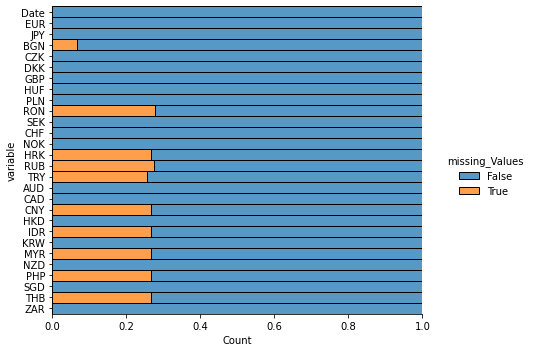

In [15]:
#Plot data after removing missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)

In [16]:
# replace remaining null  vaues with mean
forex_data['BGN'] = forex_data['BGN'].fillna(forex_data['BGN'].mean())
forex_data['RON'] = forex_data['RON'].fillna(forex_data['RON'].mean())
forex_data['TRY'] = forex_data['TRY'].fillna(forex_data['RUB'].mean())
forex_data['HRK'] = forex_data['HRK'].fillna(forex_data['HRK'].mean())
forex_data['RUB'] = forex_data['RUB'].fillna(forex_data['RUB'].mean())
forex_data['CNY'] = forex_data['CNY'].fillna(forex_data['CNY'].mean())
forex_data['IDR'] = forex_data['IDR'].fillna(forex_data['IDR'].mean())
forex_data['MYR'] = forex_data['MYR'].fillna(forex_data['MYR'].mean())
forex_data['PHP'] = forex_data['PHP'].fillna(forex_data['PHP'].mean())
forex_data['THB'] = forex_data['THB'].fillna(forex_data['THB'].mean())




<Figure size 864x576 with 0 Axes>

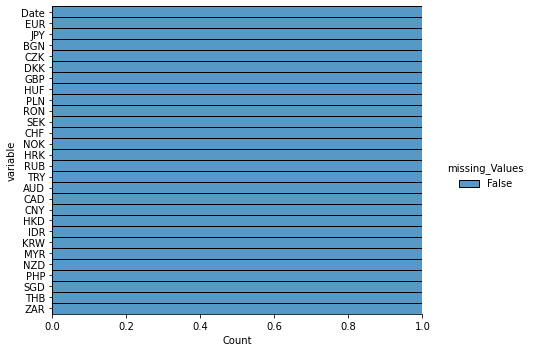

In [17]:
#view cleaned data set
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)


In [18]:
#Save cleaned data
forex_data.to_csv("/content/drive/MyDrive/ECB_FX_USD-quote-cleaned.csv")

In [19]:
#load cleaned data 
forex_cleaned_data = pd.read_csv('/content/drive/MyDrive/ECB_FX_USD-quote-cleaned.csv')
forex_cleaned_data.head()

,Unnamed: 0,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,...,CNY,HKD,IDR,KRW,MYR,NZD,PHP,SGD,THB,ZAR
0,1,2022-05-20,1.0577,0.007815,0.540802,0.042874,0.142118,1.246994,0.002762,0.228125,...,0.149735,0.127435,0.000068,0.000789,0.227845,0.640332,0.019168,0.725048,0.029151,0.063286
1,2,2022-05-19,1.0525,0.007828,0.538143,0.042611,0.141421,1.242210,0.002728,0.226720,...,0.148181,0.127431,0.000068,0.000784,0.227013,0.635913,0.019088,0.722077,0.028960,0.062532
2,3,2022-05-18,1.0523,0.007751,0.538041,0.042695,0.141402,1.242825,0.002748,0.226579,...,0.148270,0.127411,0.000068,0.000790,0.227505,0.635908,0.019106,0.720852,0.028910,0.062894
3,4,2022-05-17,1.0541,0.007733,0.538961,0.042655,0.141653,1.248934,0.002729,0.226747,...,0.148676,0.127393,0.000068,0.000790,0.228106,0.636495,0.019118,0.722531,0.028990,0.062580
4,5,2022-05-16,1.0422,0.007719,0.532877,0.042177,0.140047,1.225469,0.002701,0.223289,...,0.147233,0.127390,0.000068,0.000779,0.227376,0.627794,0.019051,0.717225,0.028731,0.061598


In [20]:
#Dropping non asian currencies
forex_cleaned_data.drop(columns=['BGN','CZK','DKK','GBP','HUF','PLN','RON','SEK','CHF','NOK','HRK','TRY','CAD','NZD','ZAR','Unnamed: 0'],inplace=True)

#Drop date col
forex_cleaned_data.drop(columns=['Date'],inplace=True)

In [21]:
forex_cleaned_data.head()

,EUR,JPY,RUB,AUD,CNY,HKD,IDR,KRW,MYR,PHP,SGD,THB
0,1.0577,0.007815,0.026077,0.706075,0.149735,0.127435,0.000068,0.000789,0.227845,0.019168,0.725048,0.029151
1,1.0525,0.007828,0.026077,0.699987,0.148181,0.127431,0.000068,0.000784,0.227013,0.019088,0.722077,0.028960
2,1.0523,0.007751,0.026077,0.702470,0.148270,0.127411,0.000068,0.000790,0.227505,0.019106,0.720852,0.028910
3,1.0541,0.007733,0.026077,0.703061,0.148676,0.127393,0.000068,0.000790,0.228106,0.019118,0.722531,0.028990
4,1.0422,0.007719,0.026077,0.692170,0.147233,0.127390,0.000068,0.000779,0.227376,0.019051,0.717225,0.028731


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


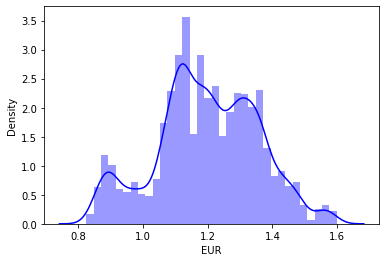

In [22]:
#checking the distribution of EUR forex values with other asian foreign currencies
sns.distplot(forex_cleaned_data['EUR'],color='blue')

In [23]:
#Get the co relation betweeen EUR and other Asian forex currencies 
correlation_asia = forex_cleaned_data.corr()

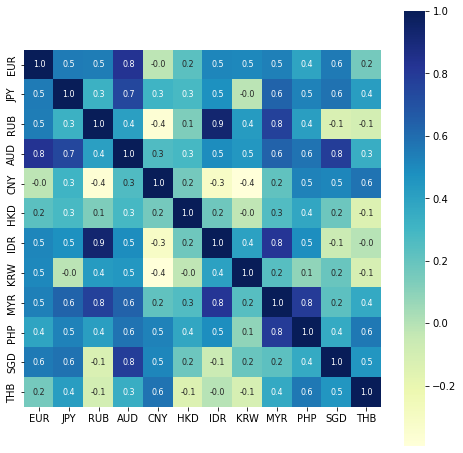

In [24]:
#plot correlation EUR and selected Asian forex currencies 
plt.figure(figsize = (8,8))
sns.heatmap(correlation_asia, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='YlGnBu')

In [25]:
# correlation values of EUR and other Asian forex currencies 
print(correlation_asia['EUR'])

EUR    1.000000
JPY    0.549708
RUB    0.547798
AUD    0.827133
CNY   -0.022448
HKD    0.228352
IDR    0.514219
KRW    0.509091
MYR    0.535417
PHP    0.387724
SGD    0.555692
THB    0.160401
Name: EUR, dtype: float64


In [26]:
#defining  variables
X_asia = forex_cleaned_data.drop(['EUR'],axis=1)
Y_asia = forex_cleaned_data['EUR']

In [27]:
print(X_asia)

           JPY       RUB       AUD       CNY       HKD       IDR       KRW  \
0     0.007815  0.026077  0.706075  0.149735  0.127435  0.000068  0.000789   
1     0.007828  0.026077  0.699987  0.148181  0.127431  0.000068  0.000784   
2     0.007751  0.026077  0.702470  0.148270  0.127411  0.000068  0.000790   
3     0.007733  0.026077  0.703061  0.148676  0.127393  0.000068  0.000790   
4     0.007719  0.026077  0.692170  0.147233  0.127390  0.000068  0.000779   
...        ...       ...       ...       ...       ...       ...       ...   
5983  0.008962  0.026077  0.633435  0.148168  0.129111  0.000090  0.000853   
5984  0.008987  0.026077  0.629642  0.148168  0.129057  0.000090  0.000870   
5985  0.008935  0.026077  0.623964  0.148168  0.129030  0.000090  0.000864   
5986  0.009003  0.026077  0.622361  0.148168  0.129077  0.000090  0.000859   
5987  0.008816  0.026077  0.617225  0.148168  0.129079  0.000090  0.000843   

           MYR       PHP       SGD       THB  
0     0.227845  

In [28]:
print(Y_asia)

0       1.0577
1       1.0525
2       1.0523
3       1.0541
4       1.0422
         ...  
5983    1.1659
5984    1.1632
5985    1.1743
5986    1.1790
5987    1.1789
Name: EUR, Length: 5988, dtype: float64


In [29]:
#Split train and testing data sets
X_asia_train, X_asia_test, Y_asia_train, Y_asia_test = train_test_split(X_asia, Y_asia, test_size = 0.2, random_state=2)

In [30]:
#Random forest regressor
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
#training the model using asian forex to predict EUR
regressor.fit(X_asia_train,Y_asia_train)

RandomForestRegressor()

In [32]:
#test prediction using asian forex currencies
test_data_prediction_asia = regressor.predict(X_asia_test)

In [33]:
print(test_data_prediction_asia)

[1.324424 0.977516 1.306238 ... 1.570142 1.373866 1.290285]


In [34]:
#calculate R squared error 
error_score = metrics.r2_score(Y_asia_test, test_data_prediction_asia)
print("R squared error : ", error_score)

R squared error :  0.9963932982155862


In [35]:
# Convert to a list
Y_asia_test=list(Y_asia_test)

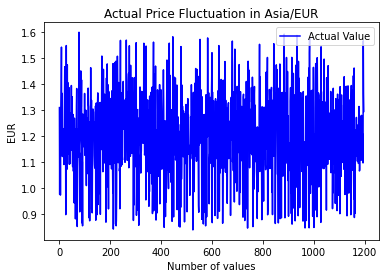

In [37]:
#plotting actual Asia/EUR values
plt.plot(Y_asia_test, color='blue', label = 'Actual Value')
plt.title('Actual Price Fluctuation in Asia/EUR')
plt.xlabel('Number of values')
plt.ylabel('EUR')
plt.legend()
plt.show()

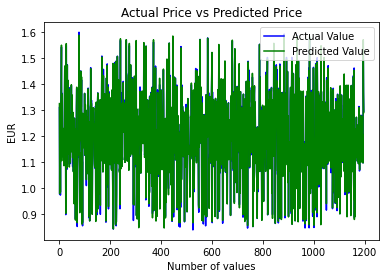

In [38]:
#plotting predicted Asia/EUR values
plt.plot(Y_asia_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction_asia, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('EUR')
plt.legend()
plt.show()